# Data Preprocessing 

#### In this notebook we perform the following data cleaning process:
 - 1. Filter the df with only rows where we have the corresponding MRI
 - 2. Remove any rows that don't have both an ADAS11 and MMSE score 
 - 3. Drop all columns corresponding to a cognitive score
 - 4. Drop all columns not present during baseline
 - 5. Correct the TAU/ABETA columns (contain strings like >1700) and transform to float
 - 6. Drop all columns with extensive NaNs and impute remaining NaNs 
 - 7. Change Datatypes to approprate type
 - 8. One Hot Encode the categorical columns

In [2]:
from prep_pipeline import *
from initialize import *
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/ADNIMERGE.csv', low_memory=False)

In [4]:
data.head(5)

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0.0,2021-02-06 04:52:41.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6.0,2021-02-06 04:52:41.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12.0,2021-02-06 04:52:41.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24.0,2021-02-06 04:52:41.0


In [6]:
all_files = os.listdir('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/input_files')

In [7]:
pipe_prep = Pipeline([('FilesWithMRI', FilesWithMRI(all_files)),
                      ('Remove NaN ADAS11 rows', RemoveNanRows(['ADAS11'])),
                      ('Remove NaN MMSE rows', RemoveNanRows(['MMSE'])),
                      ('Drop Cognitive Columns', DropRowsCog()),
                      ('Drop Non-Baseline Columns', DropNotBaseline()),
                      ('Correct TAU/ABETA', CorrectUniqueCat()),
                      ('Filter Extensive NaNs/Impute', CorrectNaNs()),
                      ('Change Data Types', ChangeDTypes()),
                      ('OneHotEncoder', OneHotEncode())
                     ])

df = pipe_prep.fit_transform(data.copy())

In [8]:
df.filenames

0       sub-ADNI100S0006_ses-M06_T1w
1       sub-ADNI100S0006_ses-M12_T1w
2       sub-ADNI100S0006_ses-M18_T1w
3       sub-ADNI100S0006_ses-M36_T1w
4       sub-ADNI100S0015_ses-M12_T1w
                    ...             
1643    sub-ADNI068S4431_ses-M84_T1w
1644    sub-ADNI018S2133_ses-M96_T1w
1645    sub-ADNI116S4855_ses-M72_T1w
1646    sub-ADNI011S4278_ses-M84_T1w
1647    sub-ADNI051S5285_ses-M48_T1w
Name: filenames, Length: 1643, dtype: object

In [9]:
df.columns

Index(['AGE', 'PTEDUCAT', 'APOE4', 'ADAS11', 'MMSE', 'ABETA_bl', 'TAU_bl',
       'PTAU_bl', 'M', 'filenames', 'DX_bl_AD', 'DX_bl_CN', 'DX_bl_EMCI',
       'DX_bl_LMCI', 'DX_bl_SMC', 'DX_bl_nan', 'PTGENDER_Female',
       'PTGENDER_Male', 'PTGENDER_nan', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTMARRY_nan'],
      dtype='object')

In [10]:
df = df.drop(columns=['PTMARRY_Unknown', 'PTMARRY_Widowed',
       'PTMARRY_nan','DX_bl_nan'])

In [11]:
df

,AGE,PTEDUCAT,APOE4,ADAS11,MMSE,ABETA_bl,TAU_bl,PTAU_bl,M,filenames,...,DX_bl_CN,DX_bl_EMCI,DX_bl_LMCI,DX_bl_SMC,PTGENDER_Female,PTGENDER_Male,PTGENDER_nan,PTMARRY_Divorced,PTMARRY_Married,PTMARRY_Never married
0,80.4,13,0.0,19.00,21,1002.240126,286.524536,27.657809,6,sub-ADNI100S0006_ses-M06_T1w,...,0,0,1,0,1,0,0,0,1,0
1,80.4,13,0.0,18.67,26,1002.240126,286.524536,27.657809,12,sub-ADNI100S0006_ses-M12_T1w,...,0,0,1,0,1,0,0,0,1,0
2,80.4,13,0.0,11.33,24,1002.240126,286.524536,27.657809,18,sub-ADNI100S0006_ses-M18_T1w,...,0,0,1,0,1,0,0,0,1,0
3,80.4,13,0.0,17.67,22,1002.240126,286.524536,27.657809,36,sub-ADNI100S0006_ses-M36_T1w,...,0,0,1,0,1,0,0,0,1,0
4,80.8,18,1.0,6.67,27,1002.240126,286.524536,27.657809,12,sub-ADNI100S0015_ses-M12_T1w,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,74.1,16,0.0,13.33,27,618.500000,158.200000,14.890000,84,sub-ADNI068S4431_ses-M84_T1w,...,0,1,0,0,0,1,0,0,1,0
1644,62.5,18,2.0,35.67,22,413.900000,328.300000,28.710000,96,sub-ADNI018S2133_ses-M96_T1w,...,0,1,0,0,1,0,0,0,1,0
1645,83.8,14,1.0,10.67,28,732.800000,228.100000,21.480000,72,sub-ADNI116S4855_ses-M72_T1w,...,1,0,0,0,0,1,0,0,1,0
1646,75.0,14,1.0,21.33,24,422.800000,205.100000,19.330000,84,sub-ADNI011S4278_ses-M84_T1w,...,1,0,0,0,0,1,0,0,1,0


In [12]:
X_tr, X_v, y_tr, y_v = get_file_splits()  

 - Replace baseline values with the corresponding data we had for the first MRI scan
 - Return the slope and intercept of the linear functions corresponding to months from baseline against the ADAS11 score

In [13]:
from scipy.stats import linregress

def get_linear_function(X_tr, df):

    data= df[df.filenames.isin(list(map(lambda x: x.split('.nii')[0], X_tr)))]
    pids = list(map(lambda x: x[8:16], data.filenames))
    patient_ids = list(set(pids))
    patient_dfs = []

    for i in range(len(patient_ids)):
        #print(i)
        patient_df = data[data.filenames.str.contains(patient_ids[i])][data.ADAS11.notnull()][['M','ADAS11']]

        # if there are no rows adas11 score
        if data[data.filenames.str.contains(patient_ids[i])][data.ADAS11.notnull()][['M','ADAS11']].empty:
            continue
        adas_min_month = float(patient_df[patient_df.M == patient_df.M.min()].ADAS11)
        month_min_month = int(patient_df[patient_df.M == patient_df.M.min()].M)
        patient_df['M'] = patient_df['M']- month_min_month
        patient_df['ADAS11'] = patient_df['ADAS11']- adas_min_month
        patient_dfs.append(patient_df)
    df_concat = pd.concat(patient_dfs)
    X = df_concat.M.values
    Y = df_concat.ADAS11.values

    slope, intercept, rval, pval, std =  linregress(X, Y)
    return X, Y, df_concat, slope, intercept, rval, pval, std

In [14]:
X, Y, df_concat, slope, intercept, rval, pval, std = get_linear_function(X_tr, df)

In [15]:
df.loc[df_concat.index, 'M'] = df_concat.M

In [16]:
df.loc[~df.index.isin(df_concat.index)].M.value_counts

<bound method IndexOpsMixin.value_counts of 2       18
5       36
7       24
10      36
17       6
        ..
1639    60
1643    84
1644    96
1645    72
1647    48
Name: M, Length: 485, dtype: int64>

In [17]:
df_concat.M

1206    0
534     0
694     0
344     0
345     6
       ..
90      0
637     0
688     0
89      0
1266    0
Name: M, Length: 1158, dtype: int64

In [18]:
df.loc[277].M

0

In [19]:
df.M.value_counts()

0     852
6     134
12    132
24    129
18     87
48     68
36     59
60     33
72     33
84     33
30     28
96     23
90     14
42     10
78      5
66      2
54      1
Name: M, dtype: int64

In [20]:
#df

In [21]:
#df.to_csv (r'data/cleaned_df_4_26.csv', index = False, header=True)

In [23]:
df = pd.read_csv('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/cleaned_df_4_26.csv')

In [24]:
## Ensure balanced train and val sets using a dummy column

df.loc[df.ADAS11 < 10, 'ADAS_refined'] = 0
df.loc[((df.ADAS11 < 20) & (df.ADAS11 >= 10)), 'ADAS_refined'] = 1
df.loc[((df.ADAS11 < 30) & (df.ADAS11 >= 20)), 'ADAS_refined'] = 2
df.loc[((df.ADAS11 < 60) & (df.ADAS11 >= 30)), 'ADAS_refined'] = 3
df.loc[((df.ADAS11 < 80) & (df.ADAS11 >= 60)), 'ADAS_refined'] = 4

X_train, X_val = train_test_split(df.filenames, test_size=0.15,stratify=df.ADAS_refined, random_state=42)

X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]

In [25]:
X_train, X_test = train_test_split(X_train, test_size=0.17,stratify=df[df.filenames.isin(X_tr)].ADAS_refined, random_state=42)

In [26]:
X_tr = [f.split('.nii')[0] for f in X_train]
X_v = [f.split('.nii')[0] for f in X_val]
X_te = [f.split('.nii')[0] for f in X_test]

In [27]:
df = df.drop(columns = 'ADAS_refined')

In [28]:
len(X_v), len(X_te), len(X_tr)

(247, 238, 1158)

In [29]:
#X_tr

In [30]:
# from joblib import dump, load
# dump(X_tr, 'train_files2.data') 
# dump(X_v, 'val_files2.data') 
# dump(X_te, 'test_files2.data') 

In [32]:
df = pd.read_csv('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/cleaned_df_4_26.csv')
X_tr = load('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/train_files2.data') 
X_v = load('/home/cpabalan/brainlabs_cp/brainlabs_prep/data/val_files2.data') 
#X_tr, X_v, y_tr, y_v = get_file_splits()
X_train, X_val, y_adas_train, y_adas_val, y_mmse_train, y_mmse_val= split_train_val(X_tr, X_v, X_tr, X_v, df)

In [33]:
X_train.shape, X_val.shape

((1158, 18), (247, 18))

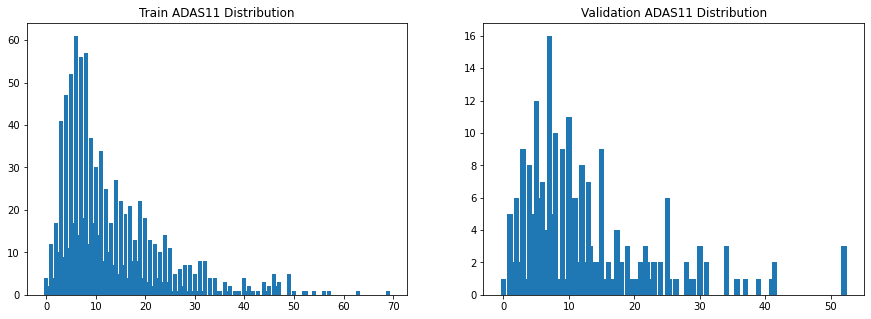

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].bar(pd.Series(y_adas_val).value_counts().keys(), pd.Series(y_adas_val).value_counts().values)
ax[1].set_title('Validation ADAS11 Distribution')
ax[0].bar(pd.Series(y_adas_train).value_counts().keys(), pd.Series(y_adas_train).value_counts().values)
ax[0].set_title('Train ADAS11 Distribution')
plt.show()

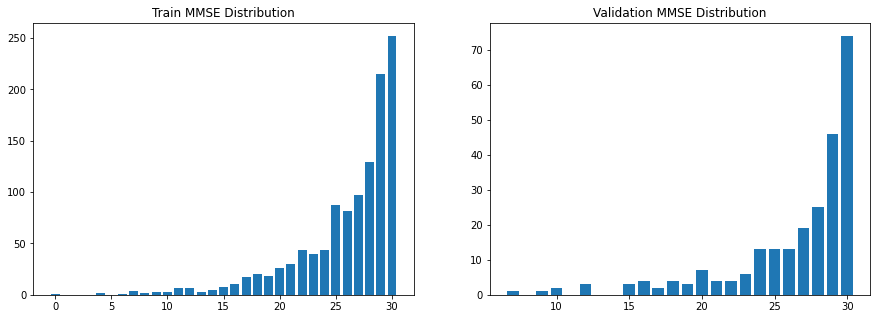

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].bar(pd.Series(y_mmse_val).value_counts().keys(), pd.Series(y_mmse_val).value_counts().values)
ax[1].set_title('Validation MMSE Distribution')
ax[0].bar(pd.Series(y_mmse_train).value_counts().keys(), pd.Series(y_mmse_train).value_counts().values)
ax[0].set_title('Train MMSE Distribution')
plt.show()